#IMPORT LIBRARY & DATASET

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Project Data Science/IDX Partners - Project Based Intern')

# Import Dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('loan_data_2007_2014.csv', index_col=0)

# Check Data
df.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###Undersrtanding Business Domain

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

- There are 14 feature that don't have any values (annual_inc_joint, dti_joint, verification_status_joint, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util)
- Some of the feature have missing value                    

#####Data Dictionary
---
- id = A unique LC assigned ID for the loan listing. (***466,285 unique value***)
- member_id = A unique LC assigned Id for the borrower member. (***466,285 unique value***)
- loan_amnt = The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. (***range : 500 - 35,000***)  
- funded_amnt = The total amount committed to that loan at that point in time. (***range : 500 - 35,000***)  
- funded_amnt_inv. (***range : 0 - 35,000***)
- term = The number of payments on the loan. Values are in months and can be either 36 or 60. (***2 unique value***)
- int_rate = Interest Rate on the loan. (***range : 5.42 - 26.06***)
- installment = The monthly payment owed by the borrower if the loan originates. (***range : 15.67 - 1409.99***)
- grade = LC assigned loan grade. (***7 unique value***)
- sub_grade = LC assigned loan subgrade. (***35 unique value***)
- emp_title = The job title supplied by the Borrower when applying for the loan. (***205,475 unique value***)
- emp_length = Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. (***11 unique value***)
- home_ownership = The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER. (***6 unique values***)
- annual_inc = The self-reported annual income provided by the borrower during registration. (***range : 1,896 - 7,500,000***)
- verification_status = Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified. (***3 unique value***)
- issue_d = The month which the loan was funded. (***91 unique value***)
- loan_status = Current status of the loan. (***9 unique value***)
- pymnt_plan = y or n. (***2 unique value***)
- url = URL for the LC page with listing data. (***466,285 unique value***)
- desc = Loan description provided by the borrower. (***124,436 unique value***)
- purpose = A category provided by the borrower for the loan request. (***14 unique value***)
- title = The loan title provided by the borrower. (***63,099 unique value***)
- zip_code = The first 3 numbers of the zip code provided by the borrower in the loan application. (***888 unique value***)
- addr_state = The state provided by the borrower in the loan application. (***50 unique value***)
- dti = A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. (***range : 0	- 39.99***)
- delinq_2yrs = The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. (***range : 0 - 29***)
- earliest_cr_line = The month the borrower's earliest reported credit line was opened. (***664 unique value***)
- inq_last_6mths = The number of inquiries in past 6 months (excluding auto and mortgage inquiries). (***range : 0 - 33***)
- mths_since_last_delinq = The number of months since the borrower's last delinquency. (***range : 0 - 188***)
- mths_since_last_record = The number of months since the last public record. (***range : 0 - 129***)
- open_acc = The number of open credit lines in the borrower's credit file. (***range : 0 - 84***)
- pub_rec = Number of derogatory public records. (***range : 0 - 63***)
- revol_bal = Total credit revolving balance. (***range : 0 - 2568995***)
- revol_util = Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. (***range : 0 - 892.3***)
- total_acc = The total number of credit lines currently in the borrower's credit file. (***range : 1 - 156***)
- initial_list_status = The initial listing status of the loan. Possible values are : Whole, Fractional. (***2	 unique value***)
- out_prncp = Remaining outstanding principal for total amount funded. (***range : 0 - 32160.38***)
- out_prncp_inv = Remaining outstanding principal for portion of total amount funded by investors. (***range : 0 - 32160.38***)
- total_pymnt = Payments received to date for total amount funded. (***range : 0 - 57777.57987***)
- total_pymnt_inv = Payments received to date for portion of total amount funded by investors. (***range : 0 - 57777.58***)
- total_rec_prncp = Principal received to date. (***range : 0 - 35000.03***)
- total_rec_int = Interest received to date. (***range : 0 - 24205.62***)
- total_rec_late_fee = Late fees received to date. (***range : 0 - 358.68***)
- recoveries = Indicates if a payment plan has been put in place for the loan. (***range : 0 - 33520.27***)
- collection_recovery_fee = post charge off collection fee. (***range : 0 - 7002.19***)
- last_pymnt_d = Last month payment was received. (***98 unique value***)
- last_pymnt_amnt = Last total payment amount received. (***range : 0 - 36234.44***)              
- next_pymnt_d = Next scheduled payment date. (***100 unique value***)                  
- last_credit_pull_d. (***103 unique value***)          
- collections_12_mths_ex_med = Number of collections in 12 months excluding medical collections. (***range : 0 - 20***)
- mths_since_last_major_derog = Months since most recent 90-day or worse rating. (***range : 0 - 188***)
- policy_code = publicly available policy_code=1.                  
- application_type = Indicates whether the loan is an individual application or a joint application with two co-borrowers. (***1 unique value***)         
- acc_now_delinq = The number of accounts on which the borrower is now delinquent. (***range : 0 - 5***)
- tot_coll_amt = Total collection amounts ever owed. (***range : 0 - 9152545.0***)
- tot_cur_bal = Total current balance of all accounts. (***range : 0 - 8000078.0***)   
- total_rev_hi_lim = Total revolving high credit/credit limit. (***range : 0 - 9999999.0***)


#EXPLORATORY DATA ANALYSIS

In [ ]:
# List indeks kolom yang ingin dihapus
columns_to_drop = [53, 54, 55, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73]

# Hapus kolom berdasarkan indeks kolom
df.drop(df.columns[columns_to_drop], axis=1, inplace=True)

In [ ]:
# jumlah data
print ('jumlah data :', df.shape[0])

jumlah data : 466285


In [ ]:
num_col = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'int_rate', 'annual_inc']
df[num_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   loan_amnt        466285 non-null  int64  
 1   funded_amnt      466285 non-null  int64  
 2   funded_amnt_inv  466285 non-null  float64
 3   installment      466285 non-null  float64
 4   int_rate         466285 non-null  float64
 5   annual_inc       466281 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 24.9 MB


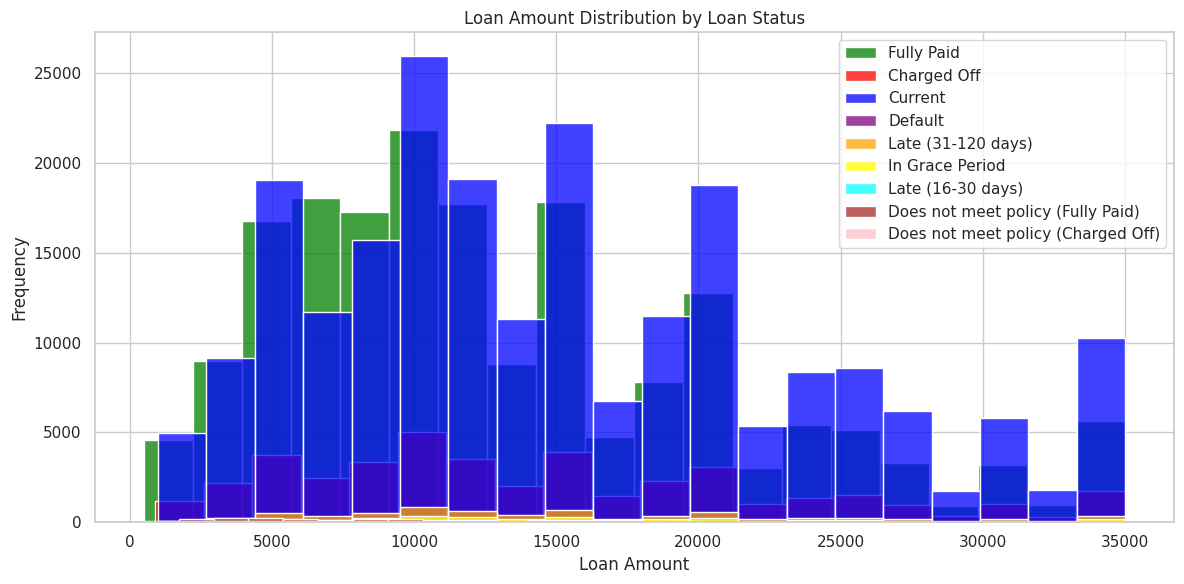

In [ ]:
# Memisahkan data berdasarkan status kredit tertentu
fully_paid = df[df['loan_status'] == 'Fully Paid']
charged_off = df[df['loan_status'] == 'Charged Off']
current = df[df['loan_status'] == 'Current']
default = df[df['loan_status'] == 'Default']
late_31_120 = df[df['loan_status'] == 'Late (31-120 days)']
in_grace_period = df[df['loan_status'] == 'In Grace Period']
late_16_30 = df[df['loan_status'] == 'Late (16-30 days)']
not_meet_policy_paid = df[df['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid']
not_meet_policy_charged_off = df[df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off']

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Histogram untuk loan_amnt
plt.figure(figsize=(12, 6))
sns.histplot(fully_paid['loan_amnt'], bins=20, color='green', label='Fully Paid')
sns.histplot(charged_off['loan_amnt'], bins=20, color='red', label='Charged Off')
sns.histplot(current['loan_amnt'], bins=20, color='blue', label='Current')
sns.histplot(default['loan_amnt'], bins=20, color='purple', label='Default')
sns.histplot(late_31_120['loan_amnt'], bins=20, color='orange', label='Late (31-120 days)')
sns.histplot(in_grace_period['loan_amnt'], bins=20, color='yellow', label='In Grace Period')
sns.histplot(late_16_30['loan_amnt'], bins=20, color='cyan', label='Late (16-30 days)')
sns.histplot(not_meet_policy_paid['loan_amnt'], bins=20, color='brown', label='Does not meet policy (Fully Paid)')
sns.histplot(not_meet_policy_charged_off['loan_amnt'], bins=20, color='pink', label='Does not meet policy (Charged Off)')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Loan Amount Distribution by Loan Status')
plt.legend()

plt.tight_layout()
plt.show()

Mayoritas status kredit yang mendominasi adalah "Current" (sedang berjalan) diikuti oleh "Fully Paid" (lunas) bisa memberikan beberapa insight terhadap pola perilaku peminjam Berikut beberapa kemungkinan interpretasi:

- *Stabilitas Keuangan Peminjam*:<br>Banyaknya kredit dengan status "Current" mungkin mengindikasikan bahwa mayoritas peminjam memiliki kestabilan keuangan yang memungkinkan mereka untuk membayar angsuran secara teratur dan menjaga kredit dalam status yang lancar.

- *Tingkat Risiko*:<br>Karena mayoritas kredit adalah "Current" dan "Fully Paid," ini bisa menunjukkan bahwa perusahaan lending cenderung memilih peminjam dengan profil risiko yang lebih rendah atau mereka telah mengimplementasikan proses seleksi yang efektif.

- *Pola Pembayaran*:<br>Peningkatan jumlah kredit dengan status "Fully Paid" mungkin menunjukkan bahwa mayoritas peminjam mampu mengelola kewajiban pembayaran mereka dan menyelesaikan pinjaman mereka sesuai rencana.

- *Efektivitas Pengelolaan Kredit*:<br>Dengan lebih banyak kredit dengan status "Fully Paid" dibandingkan dengan kredit yang telah menjadi masalah ("Charged Off," "Default," "Late"). Ini dapat memberikan pandangan tentang sejauh mana perusahaan berhasil mengelola risiko kredit.

- *Potensi Peningkatan Revenue*:<br>Fokus pada kredit yang "Current" dan "Fully Paid" bisa menjadi indikasi bahwa ada peluang untuk mengembangkan produk atau layanan yang lebih menarik bagi peminjam dengan profil risiko rendah.

- *Kecepatan Pembayaran*:<br>Dari sini dapat dianalisis lebih lanjut berapa lama rata-rata kredit berada dalam status "Current" sebelum mereka pindah ke status lain. Ini dapat membantu dalam mengidentifikasi pola pembayaran dan perilaku peminjam.

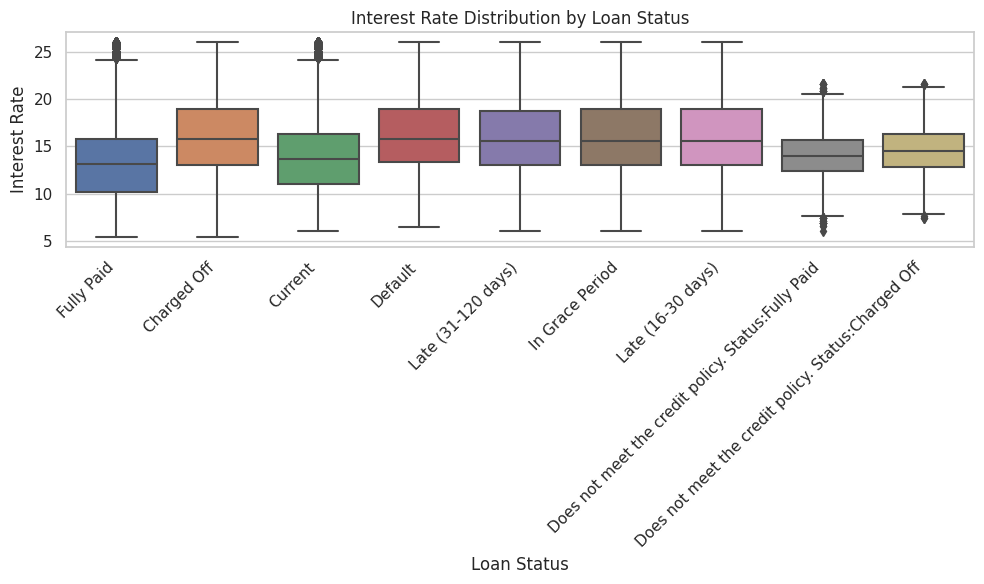

In [ ]:
# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Box plot untuk int_rate berdasarkan loan_status dengan x-axis yang lebih lebar
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Distribution by Loan Status')

# Mengatur x-axis agar lebih lebar
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Berikut beberapa kemungkinan interpretasi:

- Pola Risiko Kredit:<br>Rentang suku bunga yang lebih rendah pada status "Fully Paid" dan "Current" mungkin mengindikasikan bahwa pinjaman dengan risiko yang lebih rendah atau pelunasan yang lebih teratur cenderung memiliki suku bunga yang lebih rendah.

- Hubungan Antara Suku Bunga dan Risiko:<br>Perbedaan besar dalam rentang suku bunga antara status "Fully Paid"/"Current" dan status risiko lainnya (seperti "Charged Off" dan "Default") bisa menunjukkan bahwa suku bunga digunakan sebagai alat untuk mengelola risiko kredit. Dalam hal ini, suku bunga yang lebih tinggi mungkin diberlakukan untuk mengkompensasi risiko yang lebih tinggi pada pinjaman tersebut.

- Profil Peminjam:<br>Peminjam dengan profil risiko yang lebih baik atau histori pembayaran yang lebih baik mungkin mendapatkan suku bunga yang lebih rendah. Di sisi lain, peminjam dengan risiko yang lebih tinggi atau riwayat pembayaran yang buruk mungkin dikenakan suku bunga yang lebih tinggi.

- Strategi Bisnis:<br>Rentang suku bunga yang lebih tinggi pada status "Charged Off," "Default," "Late (31-120 days)," "In Grace Period," dan "Late (16-30 days)" mungkin mencerminkan kebijakan perusahaan untuk memitigasi risiko dan mencegah potensi kerugian lebih lanjut dengan memberikan insentif pembayaran yang lebih tinggi.

- Kecenderungan Peminjam:<br>Peminjam dengan status risiko yang lebih tinggi mungkin memahami bahwa mereka cenderung membayar suku bunga yang lebih tinggi, sehingga mereka lebih memilih untuk menghindari keterlambatan pembayaran atau default.

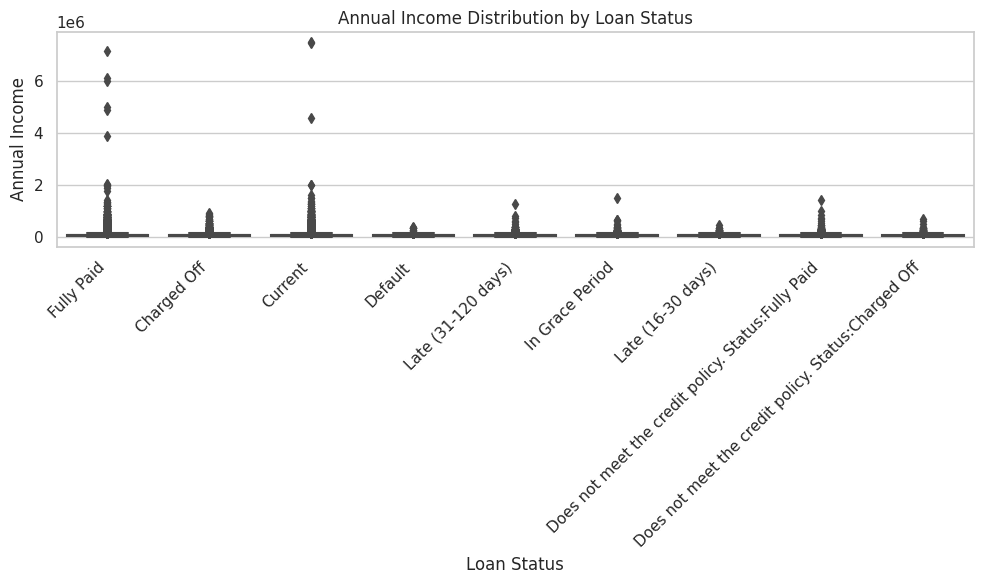

In [ ]:
# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Box plot untuk annual_inc berdasarkan loan_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.title('Annual Income Distribution by Loan Status')

# Mengatur x-axis agar lebih lebar
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Perbedaan dalam distribusi annual_inc antara status "Fully Paid" dan "Current" dengan status lainnya, serta keberadaan outlier pada kedua status tersebut, bisa memberikan beberapa insight. Berikut beberapa kemungkinan interpretasi:

- Kapasitas Pembayaran:<br>Outlier pada annual_inc pada status "Fully Paid" dan "Current" bisa mengindikasikan bahwa peminjam dengan pendapatan yang lebih tinggi cenderung memiliki kapasitas pembayaran yang lebih baik, sehingga lebih mampu membayar pinjaman tepat waktu atau sebelum waktu.

- Risiko Kredit yang Rendah:<br>Kehadiran outlier dan distribusi pendapatan tahunan yang lebih tinggi pada status "Fully Paid" dan "Current" bisa menunjukkan bahwa peminjam dengan profil risiko yang lebih rendah (dilihat dari histori pembayaran yang baik dan pendapatan yang tinggi) lebih cenderung melunasi pinjaman dengan sukses.

- Profil Peminjam Berkualitas Tinggi:<br>Peminjam dengan status "Fully Paid" dan "Current" yang memiliki pendapatan tinggi dapat dianggap sebagai peminjam yang berkualitas tinggi, yang mungkin telah mengalami proses seleksi yang lebih ketat sebelum mendapatkan pinjaman.

- Strategi Bisnis:<br>Perusahaan mungkin telah memberikan suku bunga yang lebih rendah kepada peminjam dengan pendapatan tinggi dan profil risiko rendah, sebagai insentif untuk melunasi pinjaman dengan baik. Hal ini dapat membantu menjaga tingkat risiko kredit yang rendah.

- Ketahanan Finansial:<br>Peminjam dengan pendapatan tahunan yang lebih tinggi mungkin memiliki ketahanan finansial yang lebih baik dalam menghadapi situasi keuangan yang sulit, sehingga dapat meminimalkan risiko keterlambatan.

In [ ]:
# Membuat kolom 'is_risky' berdasarkan 'loan_status'
df['is_risky'] = df['loan_status'].apply(lambda status: 1 if status in ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off'] else 0)

# Menampilkan beberapa baris awal dataset dengan kolom baru 'is_risky'
print(df[['loan_status', 'is_risky']].head())

   loan_status  is_risky
0   Fully Paid         0
1  Charged Off         1
2   Fully Paid         0
3   Fully Paid         0
4      Current         0


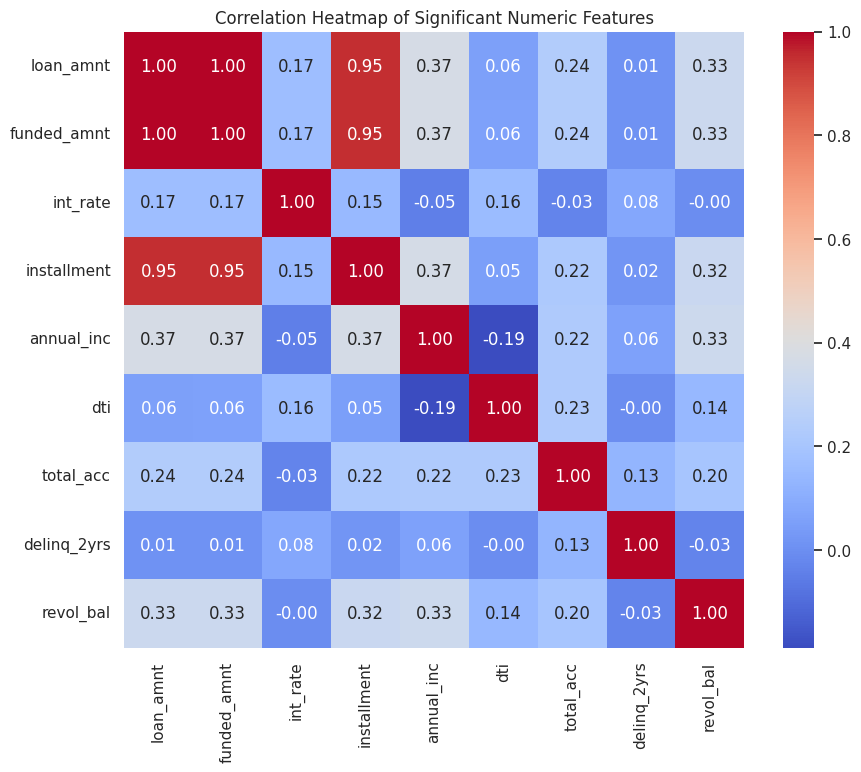

In [ ]:
# Memilih hanya fitur-fitur yang memiliki korelasi signifikan dengan target
significant_features = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'total_acc', 'delinq_2yrs', 'revol_bal']

# Menghitung matriks korelasi
correlation_matrix = df[significant_features].corr()

# Membuat heatmap dengan format angka yang lebih padat
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Significant Numeric Features')
plt.show()


Korelasi yang kuat antara "loan_amnt", "funded_amnt", dan "installment" memiliki beberapa insight yang mungkin bisa diambil:

- Konsistensi Pinjaman dan Pengembalian:<br>Korelasi yang kuat antara "loan_amnt" (jumlah pinjaman), "funded_amnt" (jumlah dana yang diberikan untuk pinjaman), dan "installment" (jumlah angsuran bulanan) menunjukkan bahwa pinjaman yang lebih besar cenderung memiliki dana yang lebih besar yang diberikan kepada peminjam, dan angsuran bulanan yang lebih besar untuk melunasi pinjaman tersebut.

- Hubungan Linier:<br>Korelasi yang tinggi antara fitur-fitur ini menunjukkan hubungan linier yang kuat antara jumlah pinjaman, jumlah dana yang diberikan, dan angsuran bulanan. Ketika jumlah pinjaman meningkat, dana yang diberikan juga cenderung meningkat, dan demikian juga angsuran bulanan yang harus dibayarkan.

- Keputusan Pemberian Pinjaman:<br>Korelasi ini dapat mengindikasikan bahwa perusahaan cenderung memberikan jumlah dana yang sesuai dengan jumlah pinjaman yang diminta oleh peminjam. Selain itu, angsuran bulanan juga akan disesuaikan berdasarkan jumlah pinjaman.

- Pentingnya Evaluasi Kelayakan Pembayaran:<br>Dalam konteks risiko kredit, korelasi ini mengingatkan pentingnya mengevaluasi kelayakan pembayaran peminjam yang mengajukan pinjaman besar. Pinjaman besar dengan angsuran bulanan yang tinggi dapat menjadi risiko jika peminjam tidak mampu membayarnya secara konsisten.

- Pemodelan Risiko:<br>Korelasi ini juga harus dipertimbangkan saat membangun model prediksi risiko kredit. Ketergantungan antara "loan_amnt", "funded_amnt", dan "installment" dapat mempengaruhi bagaimana model memprediksi risiko kredit, dan perlu diperhitungkan dengan hati-hati dalam fitur seleksi dan pemodelan.

#DATA PREPROCESSING

### Check Duplikat Data

In [ ]:
if df.duplicated().sum()==0: print('tidak ada data duplicate')
else: print('terdapat data duplicated sebanyak :', df.duplicated().sum())

tidak ada data duplicate


###Handling Missing Value

In [ ]:
# Mengidentifikasi jumlah nilai yang hilang dalam setiap kolom
missing_values = df.isnull().sum()

# Menampilkan jumlah nilai yang hilang untuk setiap kolom
print("Jumlah nilai yang hilang dalam setiap kolom:")
print(missing_values)

Jumlah nilai yang hilang dalam setiap kolom:
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delin

In [ ]:
# Mengisi annual_inc dengan rata-rata
mean_annual_inc = df['annual_inc'].mean()
df['annual_inc'].fillna(mean_annual_inc, inplace=True)

# Menghapus kolom yang tidak relevan atau memiliki banyak nilai hilang
columns_to_drop = ['emp_title', 'desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record', 'earliest_cr_line', 'next_pymnt_d', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
df.drop(columns=columns_to_drop, inplace=True)

# Mengisi nilai yang hilang pada kolom waktu dengan tanggal minimum
time_columns = ['last_pymnt_d', 'last_credit_pull_d']
for col in time_columns:
    df[col] = pd.to_datetime(df[col], format='%b-%y', errors='coerce')

# Mengatasi nilai yang hilang pada kolom numerik
numeric_columns = ['collections_12_mths_ex_med', 'acc_now_delinq', 'revol_util']
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Mengatasi nilai yang hilang pada kolom 'emp_length' dengan mengonversi nilai '10+ years' menjadi 10
df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(float)
median_emp_length = df['emp_length'].median()
df['emp_length'].fillna(median_emp_length, inplace=True)

In [ ]:
# Mengisi nilai yang hilang dengan median pada kolom numerik
numeric_columns = ['delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc']
for col in numeric_columns:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# Mengisi nilai yang hilang pada kolom tanggal dengan tanggal minimum
date_columns = ['last_pymnt_d', 'last_credit_pull_d']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%b-%y', errors='coerce')
    min_date = df[col].min()
    df[col].fillna(min_date, inplace=True)

# Menghapus kolom mths_since_last_major_derog karena nilai yang hilang terlalu banyak
df.drop(columns=['mths_since_last_major_derog'], inplace=True)

###Label Encoding

In [ ]:
# Melakukan Label Encoding pada fitur dengan tipe data object yang tersisa
from sklearn.preprocessing import LabelEncoder

object_columns = ['loan_status', 'pymnt_plan', 'url','term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'addr_state', 'zip_code']
le = LabelEncoder()

for col in object_columns:
    df[col] = le.fit_transform(df[col])

# Mengubah kolom dalam format string menjadi format datetime
date_columns = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%b-%y')

# Memecah fitur datetime menjadi fitur tambahan (tahun, bulan, hari)
df['issue_d_year'] = df['issue_d'].dt.year
df['issue_d_month'] = df['issue_d'].dt.month
df['issue_d_day'] = df['issue_d'].dt.day

df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year
df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.month
df['last_pymnt_d_day'] = df['last_pymnt_d'].dt.day

df['last_credit_pull_d_year'] = df['last_credit_pull_d'].dt.year
df['last_credit_pull_d_month'] = df['last_credit_pull_d'].dt.month
df['last_credit_pull_d_day'] = df['last_credit_pull_d'].dt.day

# Drop kolom datetime asli yang telah dipecah
df.drop(columns=date_columns, inplace=True)

#DATA MODELING

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_risky'])
y = df[['is_risky']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Selection Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Train Set): %.3f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.3f" % accuracy_score(y_test, y_pred),"\n")

    print("Precision (Train Set): %.3f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.3f" % precision_score(y_test, y_pred),"\n")

    print("Recall (Train Set): %.3f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.3f" % recall_score(y_test, y_pred),"\n")

    print("F1-Score (Train Set): %.3f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.3f" % f1_score(y_test, y_pred),"\n")

    print("roc_auc (train-proba): %.3f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.3f" % roc_auc_score(y_test, y_pred_proba[:, 1]),"\n")

    #score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True) # RECALL >, FALSE NEGATIVE <, Error Predictions for Customer Risk <
    #print('Recall (crossval train): '+ str(score['train_score'].mean()))
    #print('Recall (crossval test): '+ str(score['test_score'].mean()),"\n")

def show_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                annot_kws={"size": 14}, linewidths=0.5, linecolor="grey")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix", fontsize=14)
    plt.show()

def show_feature_importance_tree(model): # only for tree based models; DecisionTree and RandomForest
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 5))
    ax.invert_yaxis()

    plt.xlabel('Score', fontsize=13)
    plt.ylabel('Feature', fontsize=13)
    plt.title('Feature Importance Score', fontsize=13)

def show_feature_importance_reg(model): # only for regression based models; LogisticRegression
    feat_importances = pd.Series(abs(model.coef_[0]), index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 5))
    ax.invert_yaxis()

    plt.xlabel('Coefficient Magnitude', fontsize=13)
    plt.ylabel('Feature', fontsize=13)
    plt.title('Feature Importance', fontsize=13)

def show_best_hyperparameter(model): # only for tree based models; DecisionTree and RandomForest
    print(model.best_estimator_.get_params())

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
eval_classification(lr)

Accuracy (Train Set): 0.952
Accuracy (Test Set): 0.952 

Precision (Train Set): 0.964
Precision (Test Set): 0.966 

Recall (Train Set): 0.589
Recall (Test Set): 0.588 

F1-Score (Train Set): 0.731
F1-Score (Test Set): 0.731 

roc_auc (train-proba): 0.926
roc_auc (test-proba): 0.926 



In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Train Set): 1.000
Accuracy (Test Set): 1.000 

Precision (Train Set): 1.000
Precision (Test Set): 1.000 

Recall (Train Set): 1.000
Recall (Test Set): 1.000 

F1-Score (Train Set): 1.000
F1-Score (Test Set): 1.000 

roc_auc (train-proba): 1.000
roc_auc (test-proba): 1.000 



In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
eval_classification(gb)

Accuracy (Train Set): 1.000
Accuracy (Test Set): 1.000 

Precision (Train Set): 1.000
Precision (Test Set): 1.000 

Recall (Train Set): 1.000
Recall (Test Set): 1.000 

F1-Score (Train Set): 1.000
F1-Score (Test Set): 1.000 

roc_auc (train-proba): 1.000
roc_auc (test-proba): 1.000 



###Hyperparameter Tuning

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV

# Definisi model Random Forest
#rf = RandomForestClassifier(random_state=42)

# Daftar hiperparameter yang ingin diuji
#param_distributions = {
#    'n_estimators': [50, 100, 200],  # Jumlah pohon
#    'max_depth': [None, 10, 20],      # Maksimal kedalaman pohon
#    'min_samples_split': [2, 5, 10],  # Minimum sampel untuk split
#    'min_samples_leaf': [1, 2, 4]     # Minimum sampel pada leaf
#}

# Inisialisasi Random Search dengan model, parameter distributions, dan metrik yang diinginkan
#random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, scoring='recall', cv=5, random_state=42)

# Melatih model pada data pelatihan
#random_search_rf.fit(X_train, y_train)

# Hasil tuning hiperparameter terbaik
#print("Best Parameters:", random_search_rf.best_params_)
#print("Best Recall:", random_search_rf.best_score_)

# Evaluasi model dengan hyperparameter terbaik pada data uji
#best_rf = random_search_rf.best_estimator_
#eval_classification(best_rf, X_test, y_test)

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.ensemble import GradientBoostingClassifier

# Definisi model Gradient Boosting
#gb = GradientBoostingClassifier(random_state=42)

# Daftar hiperparameter yang ingin diuji
#param_dist = {
#    'n_estimators': [100, 200, 300],
#    'learning_rate': [0.01, 0.1, 0.2],
#    'max_depth': [3, 4, 5],
#    'subsample': [0.8, 1.0],
#    'max_features': ['sqrt', 'log2', None]
#}

# Inisialisasi Randomized Search dengan model, parameter distribusi, dan metrik yang diinginkan
#random_search_gb = RandomizedSearchCV(estimator=gb, param_distributions=param_dist, scoring='recall', cv=5, n_iter=10)

# Melatih model pada data pelatihan
#random_search_gb.fit(X_train, y_train)

# Hasil tuning hiperparameter terbaik
#print("Best Parameters:", random_search_gb.best_params_)
#print("Best Recall:", random_search_gb.best_score_)

# Evaluasi model dengan hiperparameter terbaik pada data uji
#best_gb = random_search_gb.best_estimator_
#eval_classification(best_gb, X_test, y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Melakukan feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definisi model Regresi Logistik
logreg = LogisticRegression(random_state=42)

# Daftar hiperparameter yang ingin diuji
param_distributions = {
    'penalty': ['l1', 'l2'],  # Jenis regulasi (penalty)
    'C': [0.001, 0.01, 0.1, 1, 10]  # Kebalikan dari parameter regulasi (semakin kecil, semakin kuat regulasinya)
}

# Inisialisasi Randomized Search dengan model, parameter distributions, dan metrik yang diinginkan
random_search_lr = RandomizedSearchCV(estimator=logreg, param_distributions=param_distributions, scoring='recall', cv=5, random_state=42)

# Melatih model pada data pelatihan yang telah di-scaled
random_search_lr.fit(X_train_scaled, y_train)

# Hasil tuning hiperparameter terbaik
print("Best Parameters:", random_search_lr.best_params_)
print("Best Recall:", random_search_lr.best_score_)

# Evaluasi model dengan hiperparameter terbaik pada data uji yang telah di-scaled
#best_logreg = random_search_lr.best_estimator_
#eval_classification(best_logreg, X_test_scaled, y_test)

Best Parameters: {'penalty': 'l2', 'C': 10}
Best Recall: 0.9504298416093514


###Feature Importance

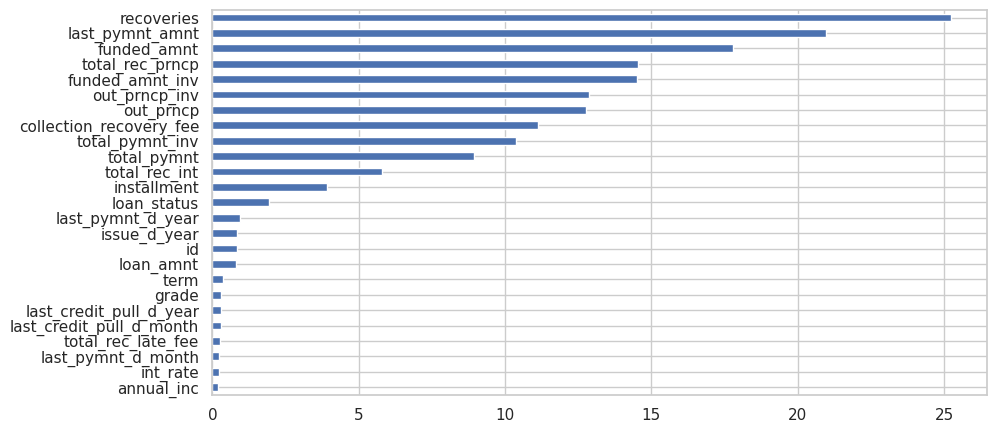

In [ ]:
def show_feature_importance_reg(model): # only for regression based models; LogisticRegression
    feat_importances = pd.Series(abs(model.coef_[0]), index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 5))
    ax.invert_yaxis()

best_logreg = random_search_lr.best_estimator_
show_feature_importance_reg(best_logreg)


Dari hasil feature importance di atas bisa diambil beberapa insight

Recoveries: Fitur ini mungkin memiliki pengaruh kuat pada prediksi risiko kredit. Nilai yang tinggi pada fitur ini mungkin menunjukkan bahwa pelanggan yang memiliki tingkat recoveries yang lebih tinggi cenderung memiliki risiko yang lebih tinggi untuk default atau gagal membayar.

Last Payment Amount (last_pymnt_amnt): Fitur ini juga memiliki pengaruh yang signifikan pada prediksi risiko kredit. Nilai yang tinggi pada fitur ini mungkin mengindikasikan bahwa pelanggan yang membayar jumlah pembayaran terakhir yang lebih tinggi memiliki peluang lebih rendah untuk default.

Funded Amount (funded_amnt): Jumlah pinjaman yang diberikan kepada pelanggan juga tampak memiliki pengaruh penting pada prediksi risiko kredit. Ini bisa diartikan bahwa semakin tinggi jumlah pinjaman yang diberikan, semakin tinggi risiko bahwa pelanggan tidak dapat membayar kembali.

###Confusion Matrix

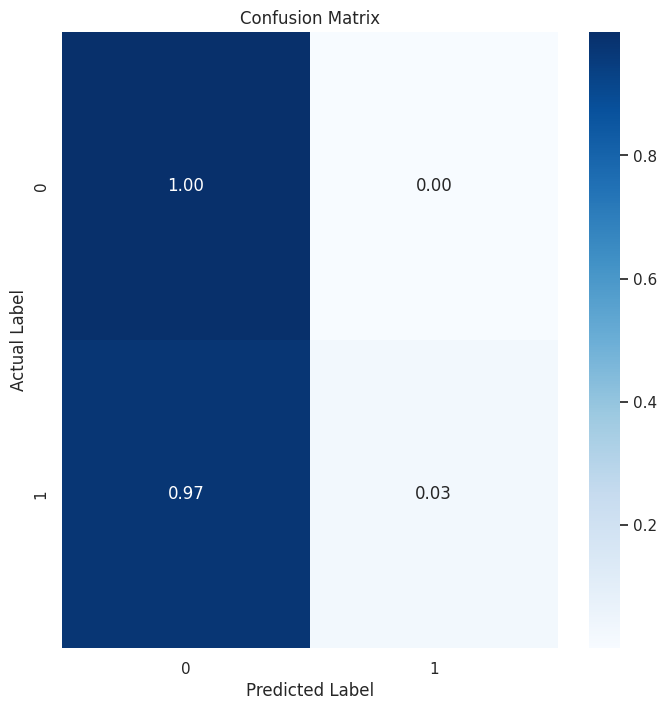

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes): #y_true = actual event, y_pred = prediction event
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #normalize (make value of matrix to : 0 - 1)

    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

y_pred = best_logreg.predict(X_test)
plot_confusion_matrix(y_test, y_pred, ['0', '1'])